In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/Users/sanket/Downloads/Medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

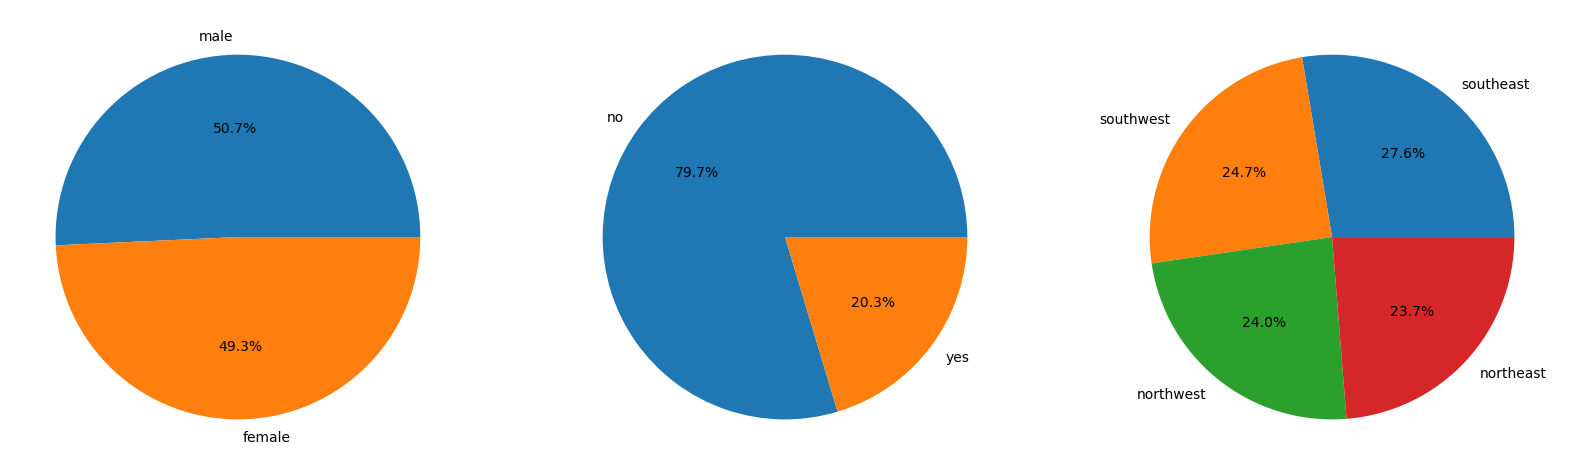

In [9]:
features=['sex','smoker','region']

plt.subplots(figsize=(20,10))
for i , col in enumerate(features):
    plt.subplot(1,3,i+1)
    
    x=df[col].value_counts()
    plt.pie(x.values,labels=x.index,autopct='%1.1f%%')
plt.show()

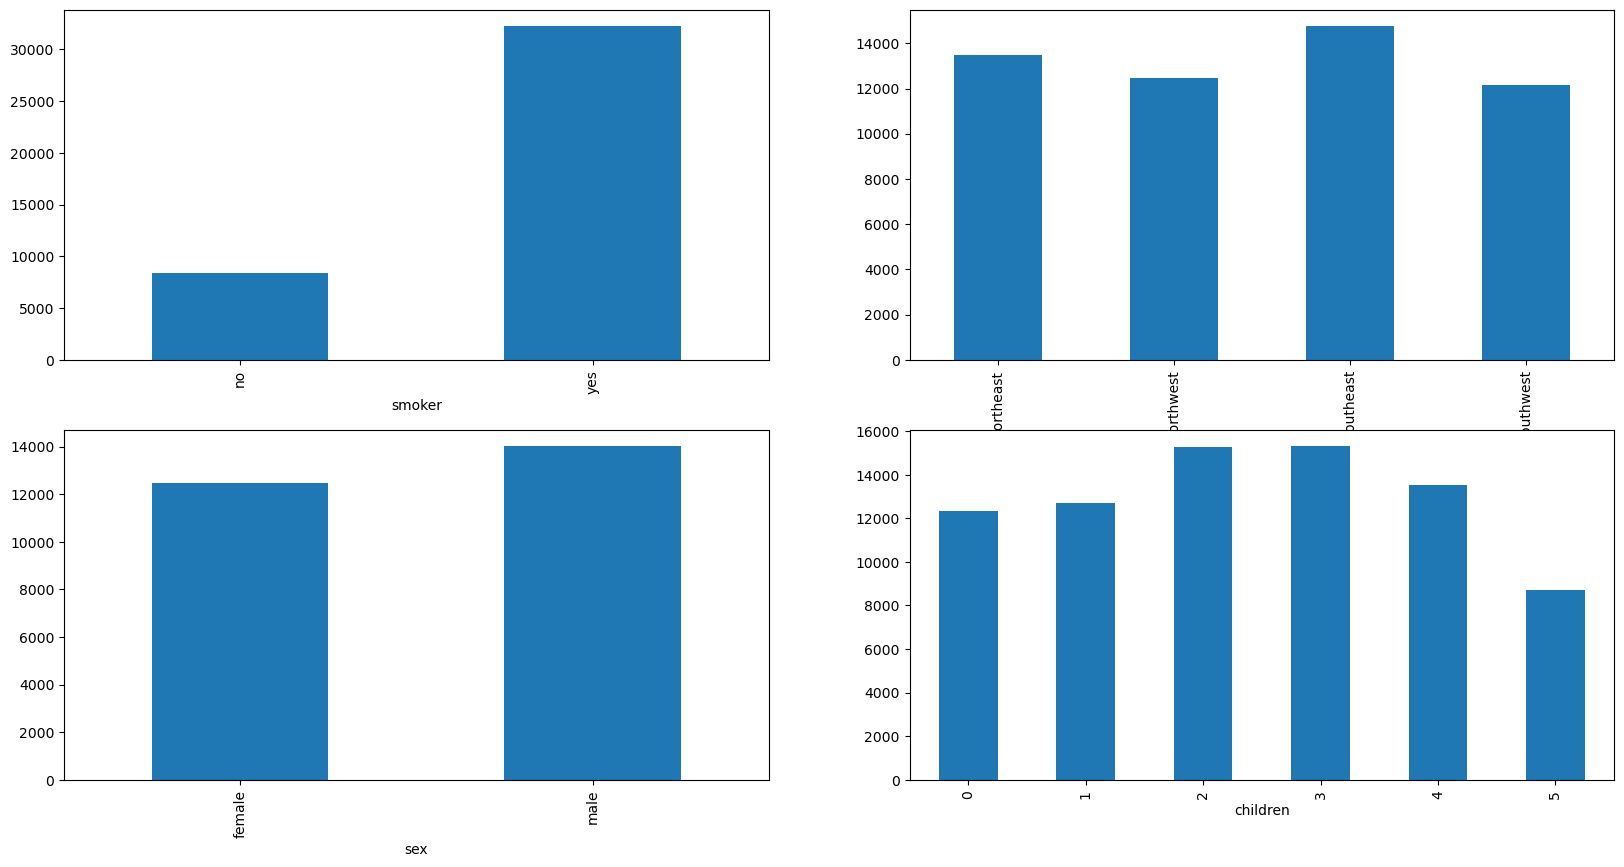

In [13]:

df['charges'] = pd.to_numeric(df['charges'], errors='coerce')
plt.subplots(figsize=(20, 10))
features = ['smoker', 'region', 'sex', 'children']
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['charges'].mean().plot.bar()
plt.show()


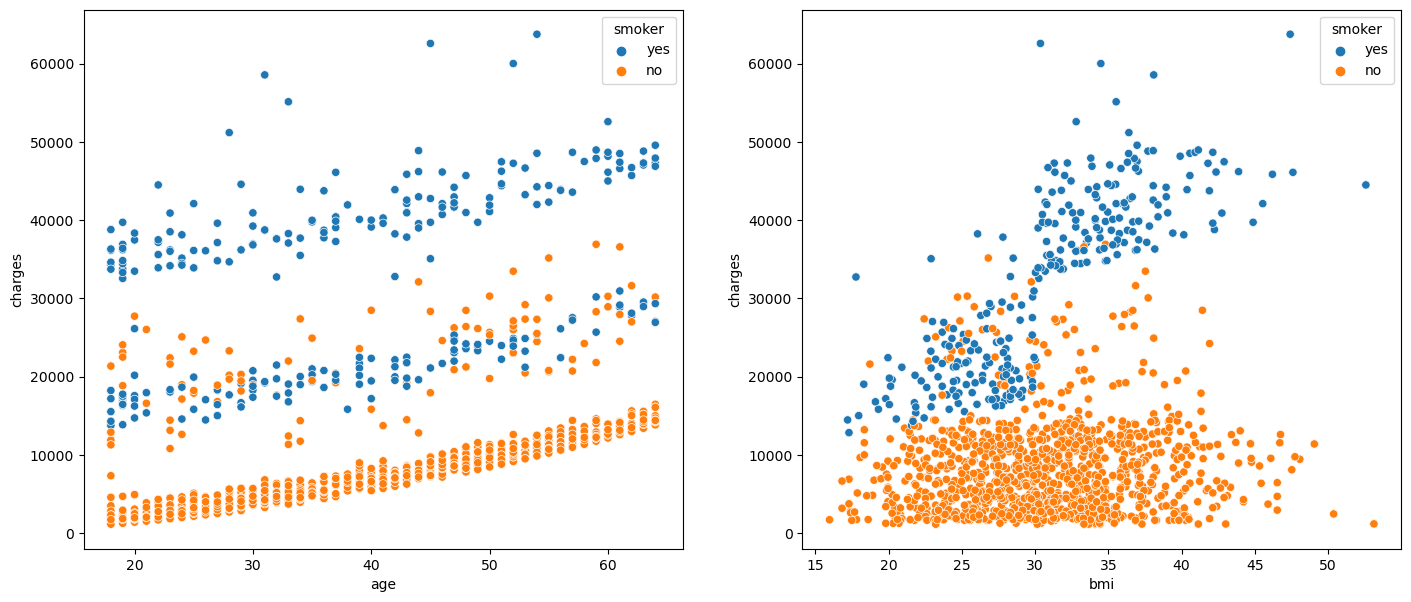

In [14]:
features=['age','bmi']

plt.subplots(figsize=(17,7))
for i,col in enumerate(features):
    plt.subplot(1,2,i+1)
    sns.scatterplot(data=df,x=col,y='charges',hue='smoker')
plt.show()    

<Axes: >

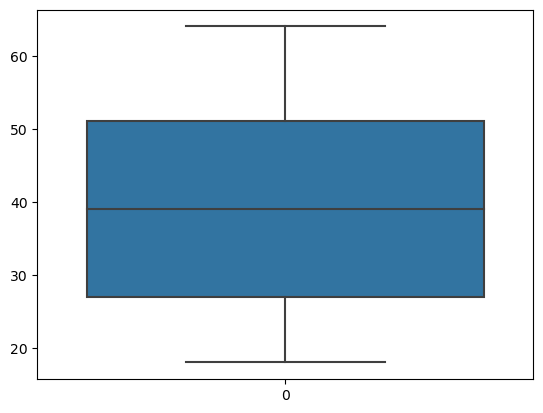

In [15]:
df.drop_duplicates(inplace=True)
sns.boxplot(df['age'])

<Axes: >

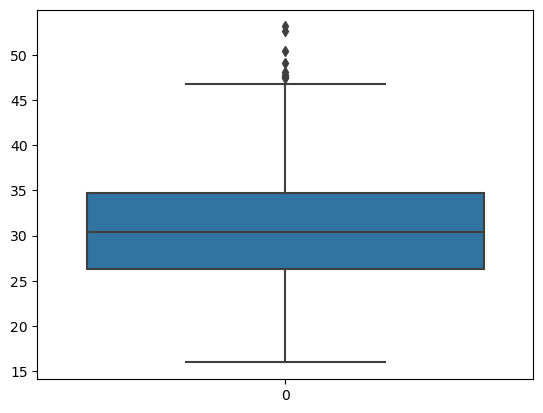

In [16]:
sns.boxplot(df['bmi'])

In [21]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

13.674999999999994
47.31500000000001


<Axes: >

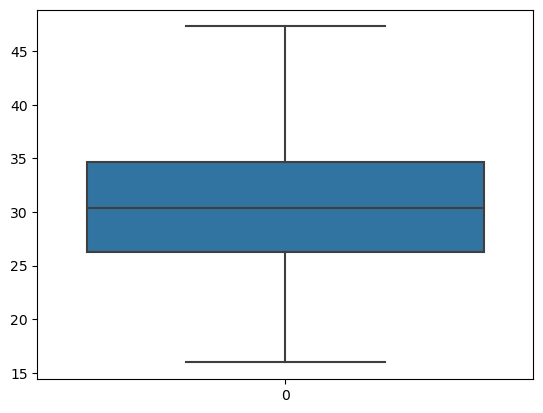

In [22]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.674},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])

In [26]:
df['bmi'].skew()


0.23289153320569975

In [27]:
df['age'].skew()

0.054780773126998195

In [28]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [30]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.111998,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.044831,-0.017848,-0.076596,-0.008998,-0.058044
bmi,0.111998,-0.044831,1.000000,0.013692,0.003151,0.156937,0.199063
children,0.041536,-0.017848,0.013692,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,0.003151,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.156937,-0.002842,0.012736,1.000000,0.010767
charges,0.298308,-0.058044,0.199063,0.067389,0.787234,0.010767,1.000000


In [31]:
x=df.drop(['charges'],axis=1)
y=df[['charges']]

from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))
print(cross_val_score(lr,x,y,cv=5,).mean())

0.7295415541376445
0.8062391115570587
0.7470697972809901


In [36]:
from sklearn.metrics import r2_score
svr=SVR()
svr.fit(x_train,y_train)
ypredtrain1=svr.predict(x_train)
ypredtest1=svr.predict(x_test)
print(r2_score(y_train,ypredtrain1))
print(r2_score(y_test,ypredtest1))
print(cross_val_score(svr,x,y,cv=5,).mean())

-0.10151474302536445
-0.1344454720199666
-0.10374591327267262


In [38]:
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(x_train,y_train)
ypredtrain2=rfmodel.predict(x_train)
ypredtest2=rfmodel.predict(x_test)
print(r2_score(y_train,ypredtrain2))
print(r2_score(y_test,ypredtest2))
print(cross_val_score(rfmodel,x,y,cv=5,).mean())

0.973802743032909
0.8818755565986645
0.8363591047753005


In [40]:
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'n_estimators': 120}


In [41]:
rfmodel=RandomForestRegressor(random_state=42,n_estimators=120)
rfmodel.fit(x_train,y_train)
ypredtrain2=rfmodel.predict(x_train)
ypredtest2=rfmodel.predict(x_test)
print(r2_score(y_train,ypredtrain2))
print(r2_score(y_test,ypredtest2))
print(cross_val_score(rfmodel,x,y,cv=5,).mean())

0.9746261550808627
0.8821404235713006
0.8367379327769348


In [42]:
gbmodel=GradientBoostingRegressor()
gbmodel.fit(x_train,y_train)
ypredtrain3=gbmodel.predict(x_train)
ypredtest3=gbmodel.predict(x_test)
print(r2_score(y_train,ypredtrain3))
print(r2_score(y_test,ypredtest3))
print(cross_val_score(gbmodel,x,y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(x_train,y_train)
ypredtrain3=gbmodel.predict(x_train)
ypredtest3=gbmodel.predict(x_test)
print(r2_score(y_train,ypredtrain3))
print(r2_score(y_test,ypredtest3))
print(cross_val_score(gbmodel,x,y,cv=5,).mean())

0.893134582116604
0.9042558673604
0.8550123897205362
{'learning_rate': 0.2, 'n_estimators': 19}
0.8682397447116926
0.9017109716082662
0.86051471152677


In [44]:
xgmodel=XGBRegressor()
xgmodel.fit(x_train,y_train)
ypredtrain4=xgmodel.predict(x_train)
ypredtest4=xgmodel.predict(x_test)
print(r2_score(y_train,ypredtrain4))
print(r2_score(y_test,ypredtest4))
print(cross_val_score(xgmodel,x,y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(x_train,y_train)
ypredtrain4=xgmodel.predict(x_train)
ypredtest4=xgmodel.predict(x_test)
print(r2_score(y_train,ypredtrain4))
print(r2_score(y_test,ypredtest4))
print(cross_val_score(xgmodel,x,y,cv=5,).mean())


0.9954123497078247
0.8548937785039912
0.808125309217053
{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}
0.8693173313051628
0.9022460881213404
0.8607115291219747


In [46]:
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=x.columns,columns=['Importance'])
feats


,Importance
age,0.038633
sex,0.000000
bmi,0.133449
children,0.011073
smoker,0.809626
region,0.007219


In [47]:
important_features=feats[feats['Importance']>0.01]
important_features

,Importance
age,0.038633
bmi,0.133449
children,0.011073
smoker,0.809626


In [57]:

X = df.drop(['charges'], axis=1)
Y = df[['charges']]

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

finalmodel = XGBRegressor(n_estimators=15, max_depth=3, gamma=0)
finalmodel.fit(xtrain, ytrain)

ypredtrain4 = finalmodel.predict(xtrain)
ypredtest4 = finalmodel.predict(xtest)

print(r2_score(ytrain, ypredtrain4))
print(r2_score(ytest, ypredtest4))

print(cross_val_score(finalmodel, X, Y, cv=5, scoring='r2').mean())

0.869105118970057
0.9007425513499979
0.8606266871712276


In [58]:
#prediction for new data

new_data=pd.DataFrame({'age':19,'sex':'male','bmi':27.9,'children':0,'smoker':'yes','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)
finalmodel.predict(new_data)

array([18035.828], dtype=float32)